# Feature 3: Data Exploration

In [1]:
import os
import math
from os import path
import sys
import bs4
import requests
import random
import time
import re
import csv
import numpy as np
import pandas as pd
import collections
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn.cluster import KMeans

## A simplifying look at the most frequently used ingredients in a cocktail

In [2]:
# Read workbook
xls = pd.ExcelFile('Workbook.xlsx')
df1 = pd.read_excel(xls, 'merged')
ingredient_list = df1['ingredient'].tolist()

together = []
words = []

# Exmaine the Ingredients
for l in ingredient_list:
    if type(l) is str:
        #only select the alphabet and the space
        whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
        word = ''.join(filter(whitelist.__contains__, l))
        if word is '':
            together.append('other')
        else:
            together.append(word.lower())
        w = word.split()
        for word in w: 
            words.append(word.lower())
    else:
        l = str(l)
        together.append('other')
            
counter=collections.Counter(words)
#print(counter)
d = dict(counter)

# A helper list to get rid of some of the excessive words
elimination = ['or','ice','cubes','water','and','fresh','','juice','for','such','as','plus','divided','slice','in','taste','de','of','optional','garnish','club','serving']

for e in elimination:
    d.pop(e,None)


## Word Cloud Generation: The most popular ingredients, methods, and liquor base

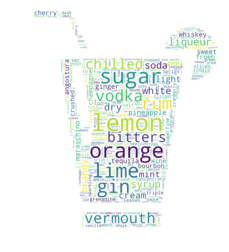

In [3]:
# Generating the Word Cloud because bar charts are lame
cocktail_mask = np.array(Image.open("cocktail.png"))

word_cloud = WordCloud(background_color="white",max_words=1628, mask=cocktail_mask, normalize_plurals=True).generate_from_frequencies(d)

word_cloud.to_file("cloud.png")
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()